#Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
from xgboost import XGBRegressor

#Data Reading

In [ ]:
# Load data
df = pd.read_csv('Walmart Dataset.csv', encoding='latin-1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,06/12/2016,06/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')

min_date = df['Order Date'].min()
max_date = df['Order Date'].max()
timeline_years = (max_date - min_date).days / 365.25
timeline_months= (max_date - min_date).days / 12
print(f"Timeline of the dataset: {timeline_years:.2f} years")
print(f"Timeline of the dataset: {timeline_months:.2f} months")

Timeline of the dataset: 3.99 years
Timeline of the dataset: 121.42 months


In [ ]:
total_sales = df['Sales'].sum()
print("Total Sales:", total_sales)

Total Sales: 2297200.8603000003


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   object        
 4   Ship Mode      9971 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [ ]:
df.describe()

,Row ID,Order Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994.000000,9994.000000,9994.000000,9945.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,55190.379428,229.858001,3.789574,0.156972,28.656896
min,1.000000,2014-01-03 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,32063.693350,623.245101,2.225110,0.206668,234.260108


In [ ]:
 df.shape

(9994, 21)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,23
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [ ]:
# Unique value counts
for col in df.columns:
    unique_count = df[col].nunique()
    print(f"{col} : {unique_count}")


Row ID : 9994
Order ID : 5009
Order Date : 1237
Ship Date : 1334
Ship Mode : 4
Customer ID : 793
Customer Name : 793
Segment : 3
Country : 1
City : 531
State : 50
Postal Code : 631
Region : 4
Product ID : 1862
Category : 3
Sub-Category : 17
Product Name : 1850
Sales : 5825
Quantity : 14
Discount : 12
Profit : 7287


#Data Preprocessing

In [ ]:
# Drop irrelevant columns
df.drop(['Row ID', 'Order ID', 'Country', 'Customer Name'], axis=1, inplace=True)

In [ ]:
# Handle missing values
df['Discount'] = df['Discount'].fillna(0)
df['Ship Mode'] = df['Ship Mode'].fillna('not_specified')

In [ ]:
# Convert dates to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%m/%d/%Y')

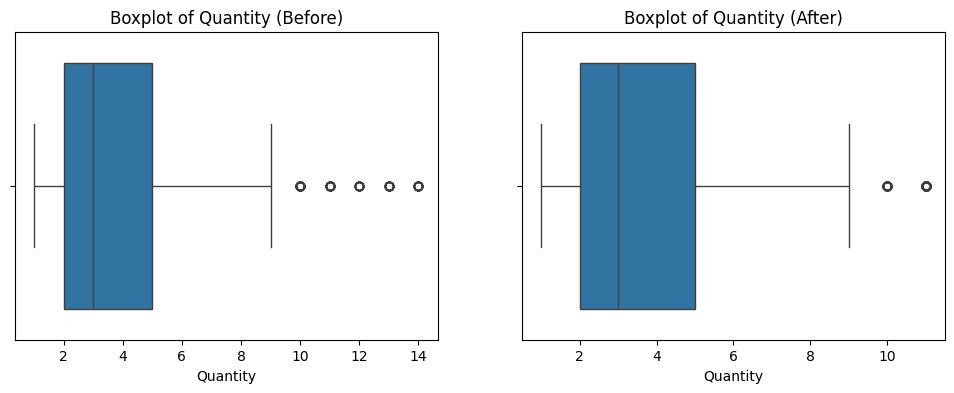

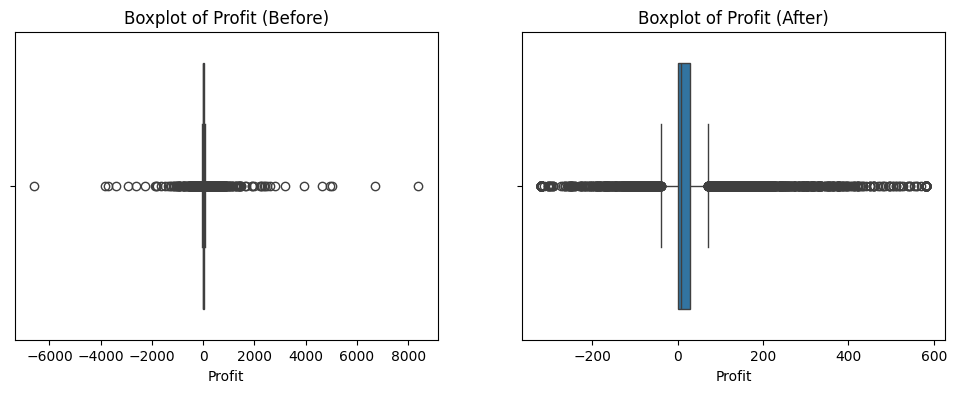

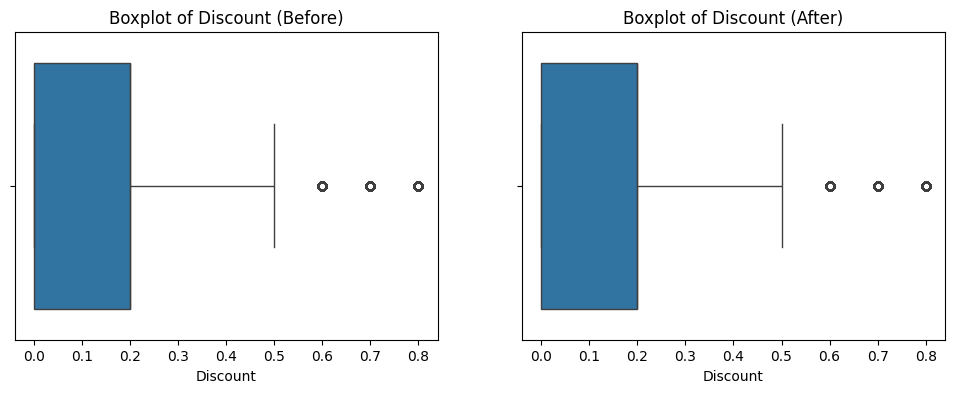

In [ ]:
# Cap outliers at 1st/99th percentiles
def handle_outliers(df, column):
    lower_bound = df[column].quantile(0.01)
    upper_bound = df[column].quantile(0.99)
    df[column] = np.clip(df[column], lower_bound, upper_bound)
    return df

for col in ['Quantity', 'Profit', 'Discount']:
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col} (Before)")
    df = handle_outliers(df, col)
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col} (After)")
    plt.show()

In [ ]:
# Remove duplicates
df.drop_duplicates(inplace=True)
print("Duplicates after removal:", df.duplicated().sum())

Duplicates after removal: 0


In [ ]:
# Feature engineering
df['Shipping Duration'] = (df['Ship Date'] - df['Order Date']).dt.days
df['Has_Discount'] = (df['Discount'] > 0).astype(int)
df['Order_Month'] = df['Order Date'].dt.month
df['Order_Year'] = df['Order Date'].dt.year
df['Order_DayOfWeek'] = df['Order Date'].dt.dayofweek
df['Discount_Quantity'] = df['Discount'] * df['Quantity']
df['Profit_Has_Discount'] = df['Profit'] * df['Has_Discount']

In [ ]:
df.to_csv('cleaned_walmart_dataset.csv', index=False)


In [ ]:
# Target encoding for high-cardinality features
def target_encode(df, column, target):
    target_mean = df.groupby(column)[target].mean()
    df[column + '_target_encoded'] = df[column].map(target_mean)
    return df

df = target_encode(df, 'City', 'Sales')
df = target_encode(df, 'Product Name', 'Sales')
df

,Order Date,Ship Date,Ship Mode,Customer ID,Segment,City,State,Postal Code,Region,Product ID,...,Profit,Shipping Duration,Has_Discount,Order_Month,Order_Year,Order_DayOfWeek,Discount_Quantity,Profit_Has_Discount,City_target_encoded,Product Name_target_encoded
0,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,Henderson,Kentucky,42420,South,FUR-BO-10001798,...,41.913600,3,0,11,2016,1,0.00,0.000000,344.099373,315.989250
1,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,Henderson,Kentucky,42420,South,FUR-CH-10000454,...,219.582000,3,0,11,2016,1,0.00,0.000000,344.099373,886.460667
2,2016-06-12,2016-06-16,Second Class,DV-13045,Corporate,Los Angeles,California,90036,West,OFF-LA-10000240,...,6.871400,4,0,6,2016,6,0.00,0.000000,235.410095,21.930000
3,2015-10-11,2015-10-18,Standard Class,SO-20335,Consumer,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,...,-319.264953,7,1,10,2015,6,2.25,-319.264953,328.635500,905.346000
4,2015-10-11,2015-10-18,Standard Class,SO-20335,Consumer,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,...,2.516400,7,1,10,2015,6,0.40,2.516400,328.635500,60.393600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,2014-01-21,2014-01-23,Second Class,TB-21400,Consumer,Miami,Florida,33180,South,FUR-FU-10001889,...,4.102800,2,1,1,2014,1,0.60,4.102800,152.159202,44.184000
9990,2017-02-26,2017-03-03,Standard Class,DB-13060,Consumer,Costa Mesa,California,92627,West,FUR-FU-10000747,...,15.633200,5,0,2,2017,6,0.00,0.000000,136.151818,143.194857
9991,2017-02-26,2017-03-03,Standard Class,DB-13060,Consumer,Costa Mesa,California,92627,West,TEC-PH-10003645,...,19.393200,5,1,2,2017,6,0.40,19.393200,136.151818,526.386857
9992,2017-02-26,2017-03-03,Standard Class,DB-13060,Consumer,Costa Mesa,California,92627,West,OFF-PA-10004041,...,13.320000,5,0,2,2017,6,0.00,0.000000,136.151818,26.886667


In [ ]:
# Drop redundant columns
df.drop(['Order Date', 'Ship Date', 'City', 'Product Name'], axis=1, inplace=True)

In [ ]:
# Scale numerical features (exclude Sales)
numeric_cols = ['Quantity', 'Discount', 'Profit', 'Shipping Duration', 'Discount_Quantity', 'Profit_Has_Discount', 'City_target_encoded', 'Product Name_target_encoded']
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

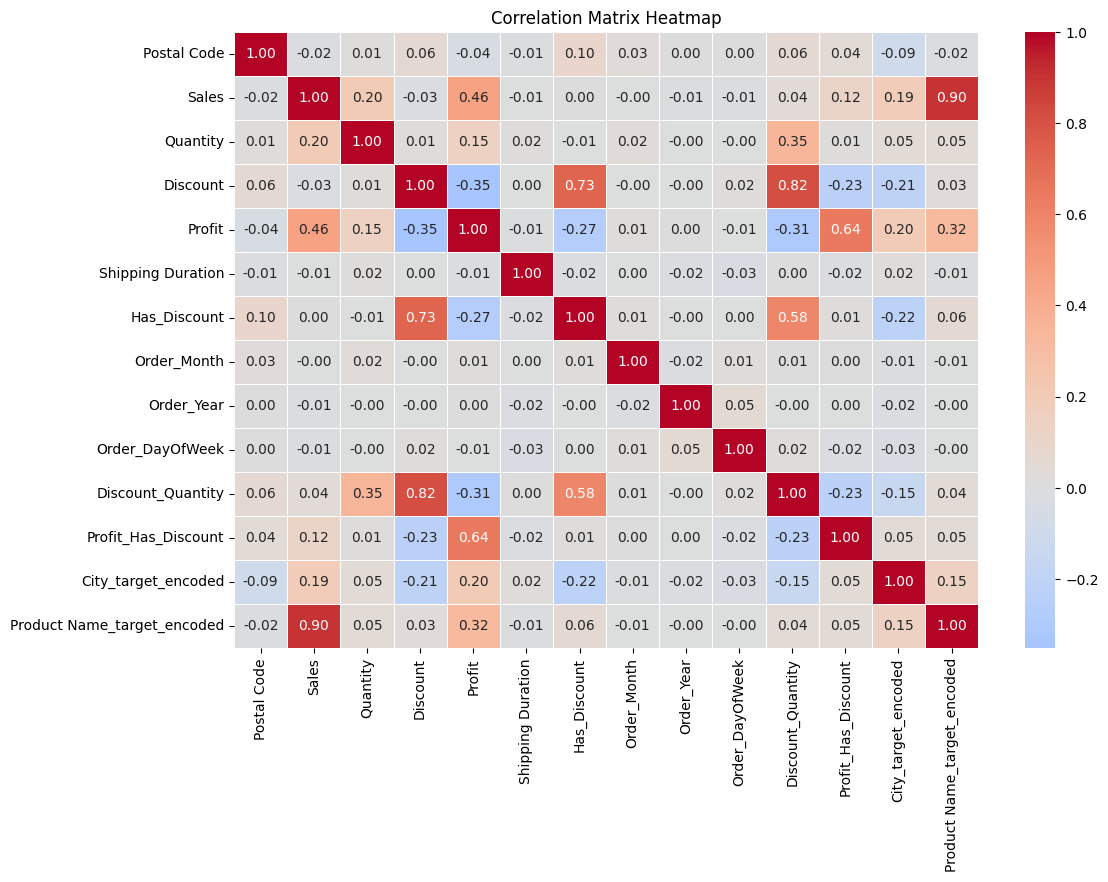

Processed Dataset Head:
         Ship Mode Customer ID      Segment           State  Postal Code  \
0     Second Class    CG-12520     Consumer        Kentucky        42420   
1     Second Class    CG-12520     Consumer        Kentucky        42420   
2     Second Class    DV-13045    Corporate      California        90036   
3   Standard Class    SO-20335     Consumer         Florida        33311   
4   Standard Class    SO-20335     Consumer         Florida        33311   
5   Standard Class    BH-11710     Consumer      California        90032   
6   Standard Class    BH-11710     Consumer      California        90032   
7   Standard Class    BH-11710     Consumer      California        90032   
8   Standard Class    BH-11710     Consumer      CALIFORNIA        90032   
9   Standard Class    BH-11710     Consumer      California        90032   
10  Standard Class    BH-11710     Consumer      California        90032   
11   not_specified    BH-11710     Consumer      California     

In [ ]:
# Correlation matrix
# Select only numeric columns for correlation
corr_matrix = df.select_dtypes(include=np.number).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

print("Processed Dataset Head:")
print(df.head(15))

#ML Models

In [ ]:
# Tolerance-based accuracy
def regression_accuracy(y_true, y_pred, tolerance=0.1):
    absolute_error = np.abs(np.expm1(y_true) - np.expm1(y_pred))  # Inverse log-transform
    relative_error = absolute_error / (np.abs(np.expm1(y_true)) + 1e-10)
    return np.mean(relative_error <= tolerance)

In [ ]:
# Define features and target
X = df.drop('Sales', axis=1)
y = np.log1p(df['Sales'])  # Replace y = df['Sales']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

# Define preprocessor
categorical_cols = ['Ship Mode', 'Segment', 'Category', 'Region', 'State']
numerical_cols = ['Quantity', 'Discount', 'Profit', 'Shipping Duration', 'Has_Discount',
                 'Order_Month', 'Order_Year', 'Order_DayOfWeek', 'Discount_Quantity',
                 'Profit_Has_Discount', 'City_target_encoded', 'Product Name_target_encoded']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numerical_cols)
    ])


In [ ]:
# Ridge Regression
ridge_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', Ridge(alpha=1.0))
])
ridge_pipeline.fit(X_train, y_train)
y_pred_ridge = ridge_pipeline.predict(X_test)

print("\n Ridge Regression Evaluation:")
print("MAE:", mean_absolute_error(y_test, y_pred_ridge))
print("MSE:", mean_squared_error(y_test, y_pred_ridge))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print("R²:", r2_score(y_test, y_pred_ridge))
#print("Tolerance-Based Accuracy (±10%):", regression_accuracy(y_test, y_pred_ridge, 0.1))
cv_scores_ridge = cross_val_score(ridge_pipeline, X, y, cv=5, scoring='r2')
print("Cross-validated R² (Ridge):", cv_scores_ridge.mean())

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(



 Ridge Regression Evaluation:
MAE: 0.8025476243907719
MSE: 0.9599703144011895
RMSE: 0.979780748127452
R²: 0.6201726795038356


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Cross-validated R² (Ridge): 0.5857022855547054


In [ ]:
# Random Forest with GridSearchCV
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])
param_grid_rf = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [10, 20, None],
    'model__min_samples_split': [2, 5]
}
grid_search_rf = GridSearchCV(rf_pipeline, param_grid_rf, cv=5, scoring='r2', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [ ]:
print("Random Forest Evaluation:")
print("Best Parameters:", grid_search_rf.best_params_)
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R²:", r2_score(y_test, y_pred_rf))
print("Tolerance-Based Accuracy (±10%):", regression_accuracy(y_test, y_pred_rf, 0.1))
cv_scores_rf = cross_val_score(best_rf, X, y, cv=5, scoring='r2')
print("Cross-validated R² (Random Forest):", cv_scores_rf.mean())

Random Forest Evaluation:
Best Parameters: {'model__max_depth': None, 'model__min_samples_split': 2, 'model__n_estimators': 200}
MAE: 0.15307852718618284
MSE: 0.04399762065107101
RMSE: 0.209756098006878
R²: 0.9825916508985725
Tolerance-Based Accuracy (±10%): 0.44172086043021513


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Cross-validated R² (Random Forest): 0.981742575310818


In [ ]:
xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(random_state=42, reg_alpha=0.1, reg_lambda=1.0))
])
param_grid_xgb = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [3, 5, 7],
    'model__learning_rate': [0.01, 0.1, 0.2]
}
grid_search_xgb = GridSearchCV(xgb_pipeline, param_grid_xgb, cv=5, scoring='r2', n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)
best_xgb = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)
y_train_pred_xgb = best_xgb.predict(X_train)

# Evaluate
print("\n XGBoost Evaluation:")
print("Best Parameters:", grid_search_xgb.best_params_)
print("MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("MSE:", mean_squared_error(y_test, y_pred_xgb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("Test R²:", r2_score(y_test, y_pred_xgb))
print("Training R²:", r2_score(y_train, y_train_pred_xgb))
def regression_accuracy(y_true, y_pred, tolerance=0.1):
    absolute_error = np.abs(y_true - y_pred)
    relative_error = absolute_error / np.abs(y_true + 1e-10)
    correct = relative_error <= tolerance
    return np.mean(correct)
print("Tolerance-Based Accuracy (±10%):", regression_accuracy(y_test, y_pred_xgb, 0.1))
cv_scores_xgb = cross_val_score(best_xgb, X, y, cv=5, scoring='r2')
print("Cross-validated R² (XGBoost):", cv_scores_xgb.mean())

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(



 XGBoost Evaluation:
Best Parameters: {'model__learning_rate': 0.1, 'model__max_depth': 7, 'model__n_estimators': 200}
MAE: 0.15053664645373147
MSE: 0.04169768570814235
RMSE: 0.20420011192000445
Test R²: 0.983501656253512
Training R²: 0.9955125582569215
Tolerance-Based Accuracy (±10%): 0.9109554777388694


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Cross-validated R² (XGBoost): 0.9816963597972925


In [ ]:
# Print sample of actual vs. predicted values
comparison = pd.DataFrame({
    'Actual Sales': y_test[:10].values,
    'Predicted Sales': y_pred_xgb[:10]
})
print("\nSample of Actual vs. Predicted Sales (XGBoost):")
print(comparison)


Sample of Actual vs. Predicted Sales (XGBoost):
   Actual Sales  Predicted Sales
0      3.402863         3.260861
1      5.805204         6.018963
2      1.202372         1.276245
3      2.829442         2.859321
4      2.239006         2.234321
5      5.198447         5.105429
6      4.315486         3.904611
7      4.241039         4.266966
8      4.673576         4.286162
9      3.609620         3.266052


In [ ]:
# Use the defined 'best_xgb' pipeline to predict on the training data
y_train_pred_xgb = best_xgb.predict(X_train)
r2_train_xgb = r2_score(y_train, y_train_pred_xgb)
print(f"R2 for training set (XGBoost): {r2_train_xgb:.4f}")

R2 for training set (XGBoost): 0.9955



Sample of Actual vs. Predicted Sales (XGBoost):
   Actual Sales  Predicted Sales
0      3.402863         3.260861
1      5.805204         6.018963
2      1.202372         1.276245
3      2.829442         2.859321
4      2.239006         2.234321
5      5.198447         5.105429
6      4.315486         3.904611
7      4.241039         4.266966
8      4.673576         4.286162
9      3.609620         3.266052


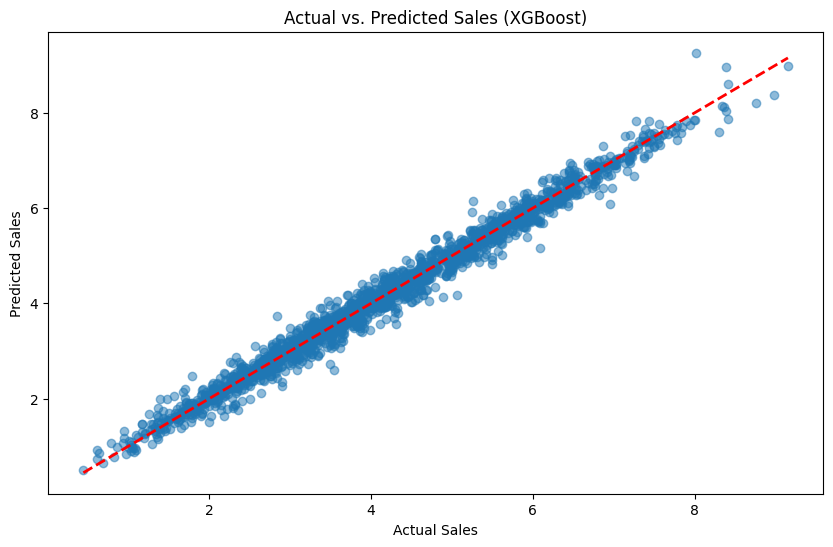

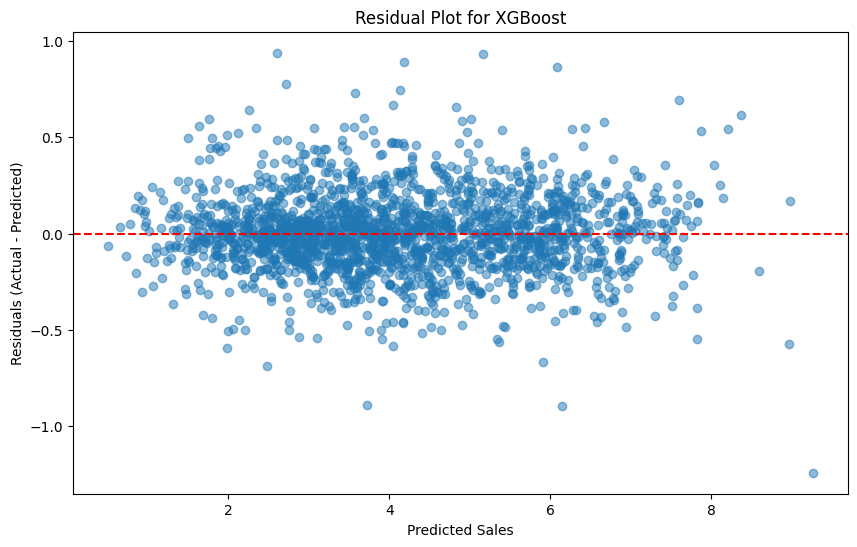

In [ ]:
# Print sample of actual vs. predicted values
comparison = pd.DataFrame({
    'Actual Sales': y_test[:10].values,
    'Predicted Sales': y_pred_xgb[:10]
})
print("\nSample of Actual vs. Predicted Sales (XGBoost):")
print(comparison)

# Scatter plot of actual vs. predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales (XGBoost)')
plt.show()

# Residual plot
residuals = y_test - y_pred_xgb
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_xgb, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot for XGBoost')
plt.show()

In [ ]:
# Stacking Ensemble with Linear Regression
estimators = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('xgb', XGBRegressor(n_estimators=100, random_state=42)),
]
stacking_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', StackingRegressor(estimators=estimators, final_estimator=Ridge()))
])
stacking_pipeline.fit(X_train, y_train)
y_pred_stack = stacking_pipeline.predict(X_test)

print("\n🔹 Stacking Ensemble Evaluation (with Linear Regression):")
print("MAE:", mean_absolute_error(y_test, y_pred_stack))
print("MSE:", mean_squared_error(y_test, y_pred_stack))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_stack)))
print("R²:", r2_score(y_test, y_pred_stack))
#print("Tolerance-Based Accuracy (±10%):", regression_accuracy(y_test, y_pred_stack, 0.1))
cv_scores_stack = cross_val_score(stacking_pipeline, X, y, cv=5, scoring='r2')
print("Cross-validated R² (Stacking):", cv_scores_stack.mean())

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(



🔹 Stacking Ensemble Evaluation (with Linear Regression):
MAE: 0.14671414281445422
MSE: 0.040154000929667415
RMSE: 0.20038463246882834
R²: 0.98411243936243


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Cross-validated R² (Stacking): 0.9827661762999561


#Visualization

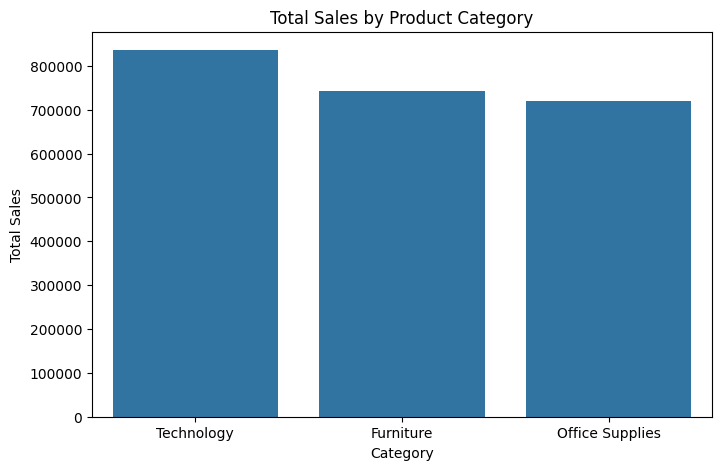

In [ ]:
# Restore original categorical values for visualization
# (Note: We can't inverse-transform one-hot encoded features, so skip this for simplicity or reload original data if needed)
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=category_sales.index, y=category_sales.values)
plt.title('Total Sales by Product Category')
plt.ylabel('Total Sales')
plt.xlabel('Category')
plt.show()

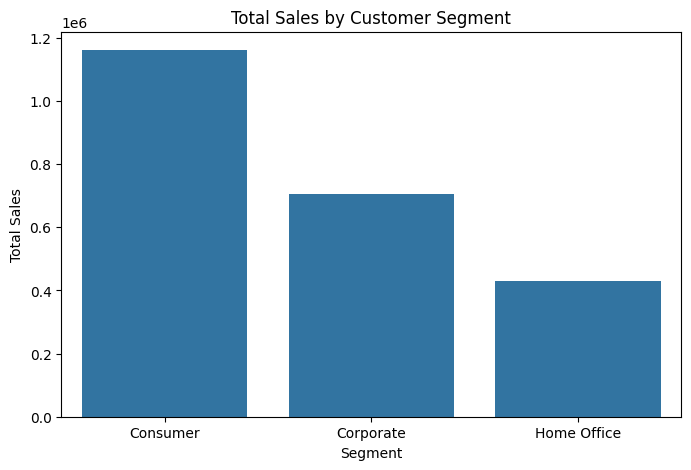

In [ ]:
segment_sales = df.groupby('Segment')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=segment_sales.index, y=segment_sales.values)
plt.title('Total Sales by Customer Segment')
plt.ylabel('Total Sales')
plt.xlabel('Segment')
plt.show()

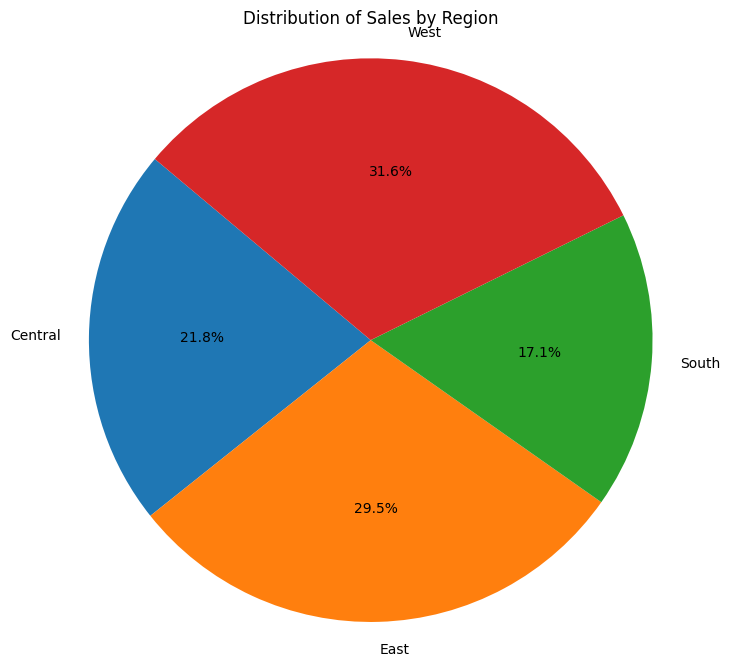

In [ ]:
region_data = df.groupby('Region')['Sales'].sum()
plt.figure(figsize=(8, 8))
plt.pie(region_data, labels=region_data.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Sales by Region')
plt.axis('equal')
plt.show()

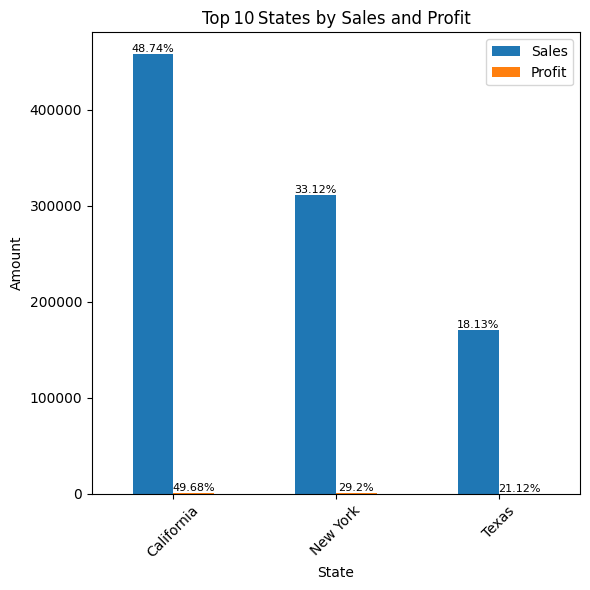

In [ ]:
top_states = (df.groupby('State')[['Sales', 'Profit']]
                .sum()
                .sort_values('Sales', ascending=False)
                .head(3))

# ── 3.  Add percentage‑of‑total columns ──────────────────────────────────
totals = top_states[['Sales', 'Profit']].sum()
top_states['Sales %']  = (top_states['Sales']  / totals['Sales']  * 100).round(2)
top_states['Profit %'] = (top_states['Profit'] / totals['Profit'] * 100).round(2)

# ── 4.  Plot with percentage annotations ────────────────────────────────
ax = top_states[['Sales', 'Profit']].plot(kind='bar', figsize=(6, 6))
plt.title('Top 10 States by Sales and Profit')
plt.ylabel('Amount')
plt.xticks(rotation=45)

for container, pct_col in zip(ax.containers, ['Sales %', 'Profit %']):
    for bar, pct in zip(container, top_states[pct_col]):
        ax.annotate(f'{pct}%', (bar.get_x() + bar.get_width()/2, bar.get_height()),
                    ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()



# **Time series**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

df_clean = pd.read_csv('/content/cleaned_walmart_dataset.csv', encoding='latin-1')

# df_clean['Order Date'] = pd.to_datetime(df_clean['Order Date'])

df_clean['Order Date'] = pd.to_datetime(df_clean['Order Date'])

df_clean = df_clean.sort_values('Order Date')

df_clean.set_index('Order Date', inplace=True)

df_clean = df_clean[~df_clean.index.duplicated()]  # Remove duplicate dates
df_clean = df_clean.asfreq('D', fill_value=0)  # Daily frequency, fill missing with 0

monthly_sales = df_clean['Sales'].resample('M').sum()
# daily_sales = df['Sales'].resample('D').sum()

monthly_sales.head()


<ipython-input-36-4f8289450e96>:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df_clean['Sales'].resample('M').sum()


,Sales
Order Date,
2014-01-31,2132.049
2014-02-28,1232.854
2014-03-31,6480.667
2014-04-30,9298.782
2014-05-31,9177.233


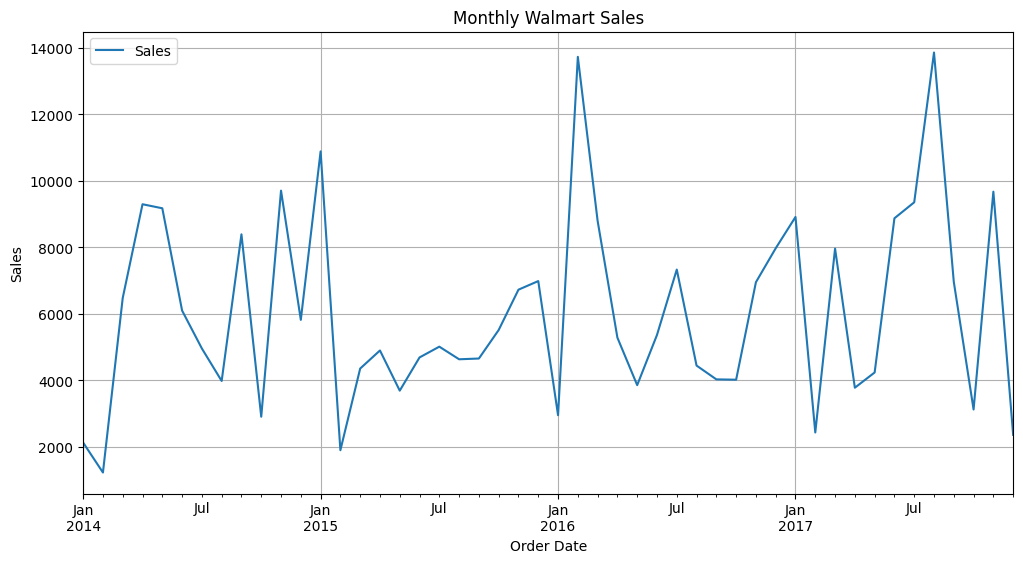

In [ ]:
monthly_sales.plot(figsize=(12,6), title="Monthly Walmart Sales")
plt.ylabel("Sales")
plt.legend(loc='best')
plt.grid(True)
plt.show()


In [ ]:
#print(df_clean.columns)
print(df_clean.index.is_monotonic_increasing)


True


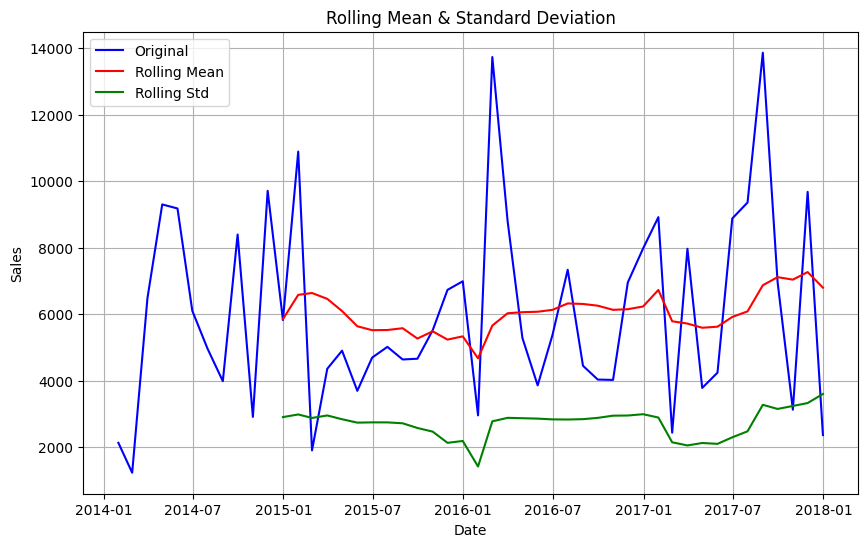

ADF Statistic: -6.658487637128929
p-value: 4.914928918766621e-09
Critical Values:
	1%: -3.5778480370438146
	5%: -2.925338105429433
	10%: -2.6007735310095064


In [ ]:
def stationarize_series(series):
    # Calculate rolling statistics
    rolling_mean = series.rolling(window=12).mean()
    rolling_std = series.rolling(window=12).std()

    # Plot rolling statistics
    plt.figure(figsize=(10, 6))
    plt.plot(series, label='Original', color='blue')
    plt.plot(rolling_mean, label='Rolling Mean', color='red')
    plt.plot(rolling_std, label='Rolling Std', color='green')
    plt.title('Rolling Mean & Standard Deviation')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

    # Perform Dickey-Fuller test
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')

stationarize_series(monthly_sales)

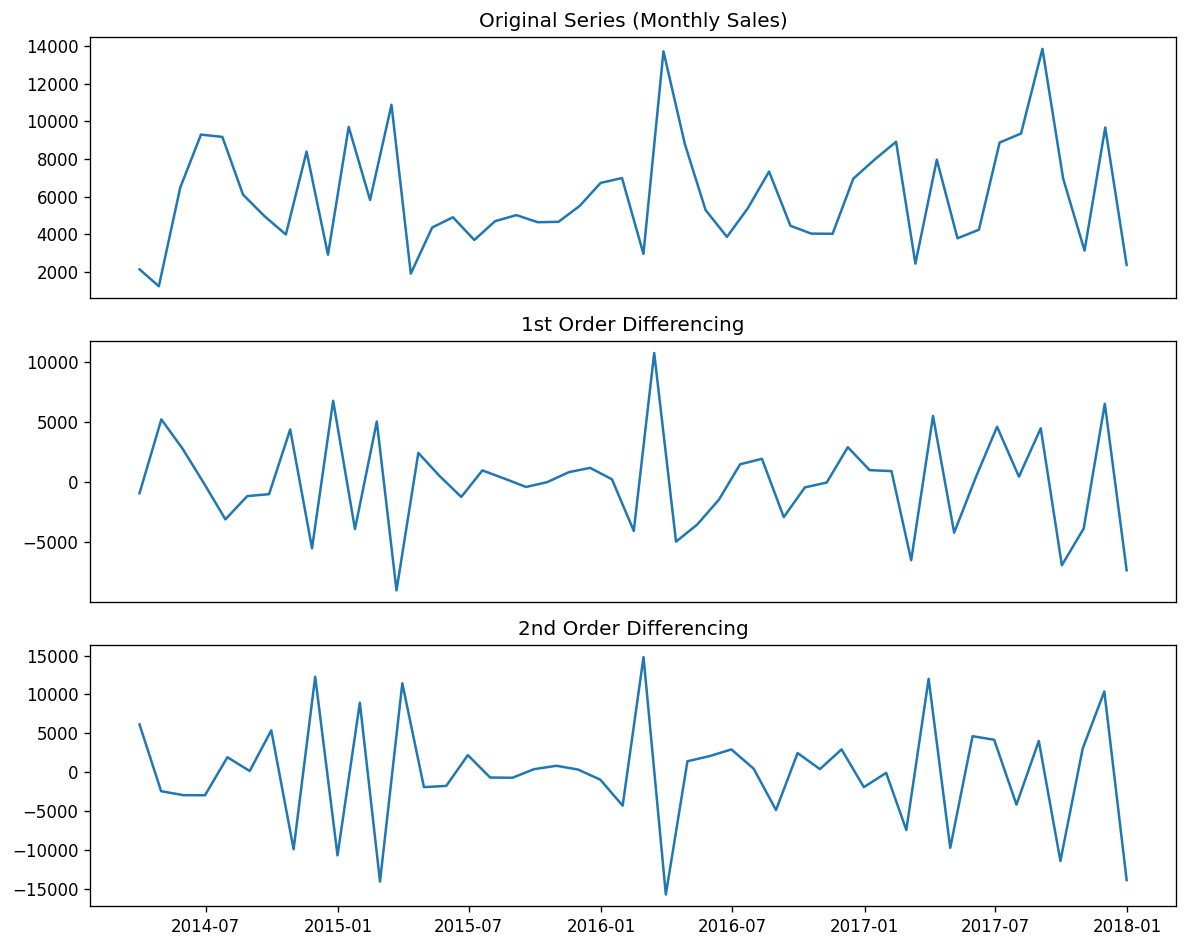

Since the p-value from the ADF test was less than 0.05, the time series is stationary.
Therefore, no differencing is required, and we can set d = 0 in the ARIMA model.


In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Plotting original, 1st order differenced, and 2nd order differenced series
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':120})

fig, (ax1, ax2, ax3) = plt.subplots(3)

# Original Series
ax1.plot(monthly_sales)
ax1.set_title('Original Series (Monthly Sales)')
ax1.axes.xaxis.set_visible(False)

# 1st Differencing
ax2.plot(monthly_sales.diff())
ax2.set_title('1st Order Differencing')
ax2.axes.xaxis.set_visible(False)

# 2nd Differencing
ax3.plot(monthly_sales.diff().diff())
ax3.set_title('2nd Order Differencing')

plt.tight_layout()
plt.show()

# ✅ Interpretation:
print("Since the p-value from the ADF test was less than 0.05, the time series is stationary.")
print("Therefore, no differencing is required, and we can set d = 0 in the ARIMA model.")


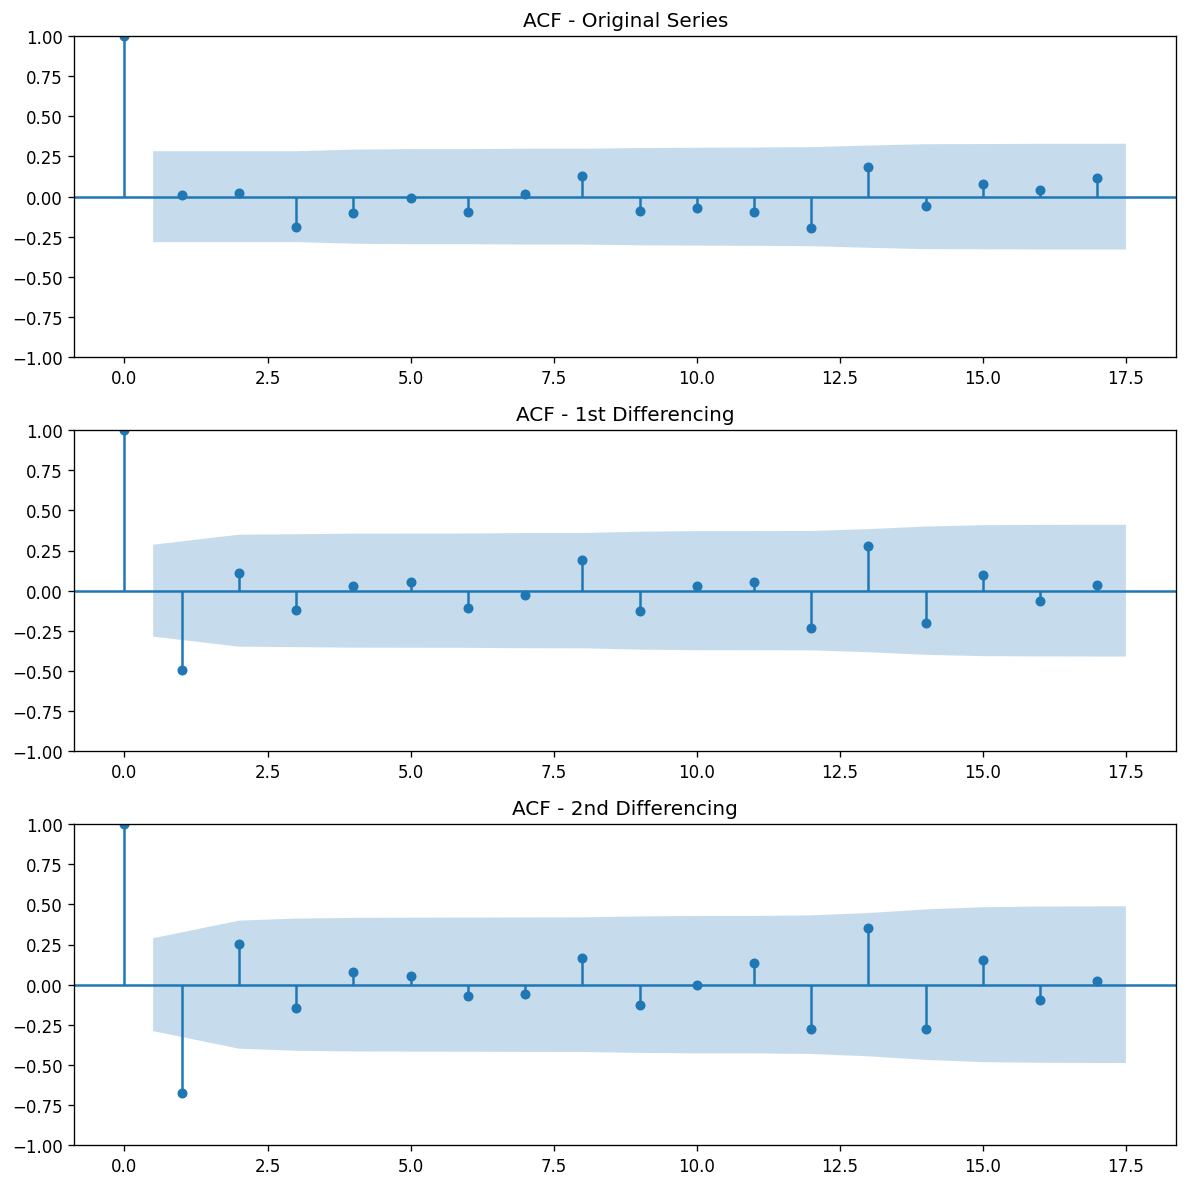

In [ ]:
# Plotting ACFs for original and differenced series
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(10, 10))

plot_acf(monthly_sales, ax=ax1, title='ACF - Original Series')
plot_acf(monthly_sales.diff().dropna(), ax=ax2, title='ACF - 1st Differencing')
plot_acf(monthly_sales.diff().diff().dropna(), ax=ax3, title='ACF - 2nd Differencing')

plt.tight_layout()
plt.show()

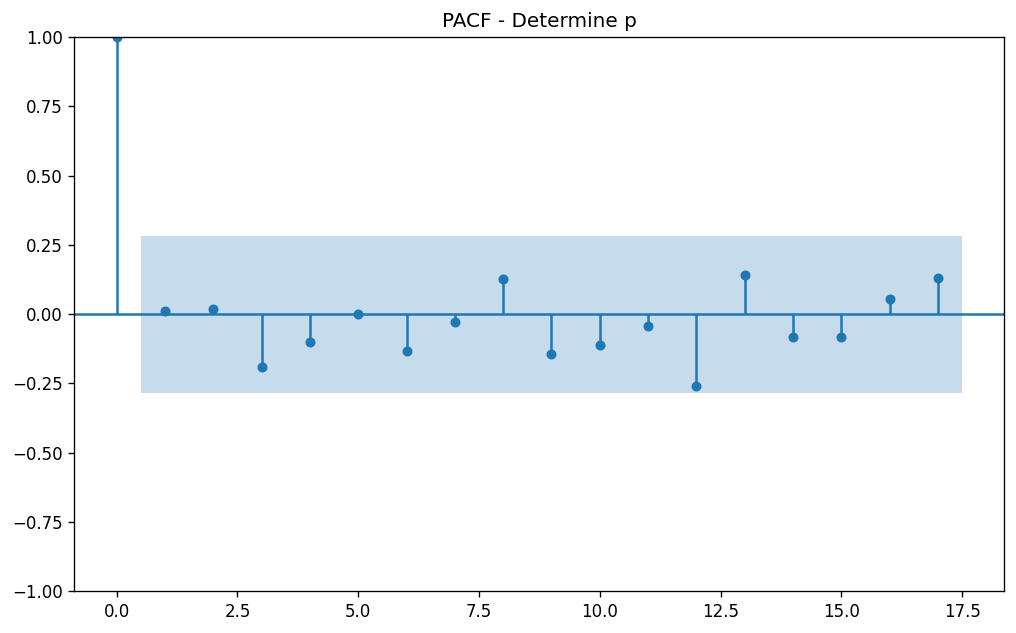

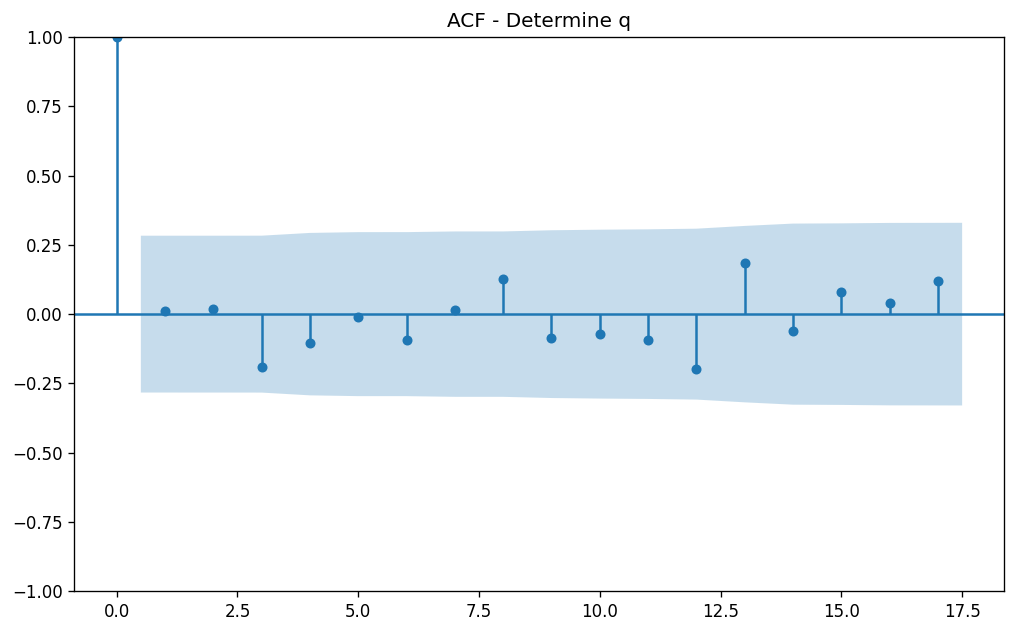

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
import matplotlib.pyplot as plt

# Set plot size
plt.rcParams.update({'figure.figsize':(10,6), 'figure.dpi':120})

# Since our series is stationary (ADF p-value < 0.05), we don't need differencing.
# So we plot PACF and ACF on the original series to determine p and q.

# PACF for determining p
plot_pacf(monthly_sales)
plt.title('PACF - Determine p')
plt.show()

# ACF for determining q
plot_acf(monthly_sales)
plt.title('ACF - Determine q')
plt.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
from sklearn.metrics import mean_absolute_percentage_error

# Split data into train and test sets (80-20 split)
train_size = int(len(monthly_sales) * 0.8)
train, test = monthly_sales[:train_size], monthly_sales[train_size:]

# Try different ARIMA models and compare performance using MAPE
models = [
    ('ARIMA(1,0,0)', (1,0,0)),
    ('ARIMA(0,0,1)', (0,0,1)),
    ('ARIMA(1,0,1)', (1,0,1)),
    ('ARIMA(2,0,0)', (2,0,0)),
    ('ARIMA(0,0,2)', (0,0,2)),
    ('ARIMA(2,0,1)', (2,0,1)),
    ('ARIMA(1,0,2)', (1,0,2))
]

results = []
for name, order in models:
    try:
        # Fit model on training data
        model = ARIMA(train, order=order)
        model_fit = model.fit()

        # Forecast on test data
        forecast = model_fit.forecast(steps=len(test))

        # Calculate metrics
        mape = mean_absolute_percentage_error(test, forecast) * 100

        # Store results
        results.append({
            'Model': name,
            'Order': order,
            'MAPE': mape,
            'AIC': model_fit.aic,
            'BIC': model_fit.bic
        })
    except Exception as e:
        print(f"Error with {name}: {str(e)}")
        results.append({
            'Model': name,
            'Order': order,
            'MAPE': None,
            'AIC': None,
            'BIC': None
        })

# Create and display results
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('MAPE')
print(results_df)

# Get the best model based on MAPE
best_model_name = results_df.iloc[0]['Model']
best_order = results_df.iloc[0]['Order']
print(f"\nBest model based on MAPE: {best_model_name}")

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


          Model      Order       MAPE         AIC         BIC
6  ARIMA(1,0,2)  (1, 0, 2)  52.238550  715.984990  724.172921
0  ARIMA(1,0,0)  (1, 0, 0)  53.546348  713.325743  718.238502
2  ARIMA(1,0,1)  (1, 0, 1)  53.546369  715.446827  721.997172
1  ARIMA(0,0,1)  (0, 0, 1)  53.546395  713.457927  718.370685
3  ARIMA(2,0,0)  (2, 0, 0)  53.908087  715.435829  721.986174
4  ARIMA(0,0,2)  (0, 0, 2)  53.987747  715.296920  721.847264
5  ARIMA(2,0,1)  (2, 0, 1)  54.620430  711.859634  720.047564

Best model based on MAPE: ARIMA(1,0,2)


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   48
Model:                 ARIMA(1, 0, 2)   Log Likelihood                -450.342
Date:                Mon, 19 May 2025   AIC                            910.683
Time:                        07:31:28   BIC                            920.039
Sample:                    01-31-2014   HQIC                           914.219
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       6052.8390    524.152     11.548      0.000    5025.519    7080.159
ar.L1         -0.4607      0.960     -0.480      0.631      -2.342       1.420
ma.L1          0.5008      0.954      0.525      0.6

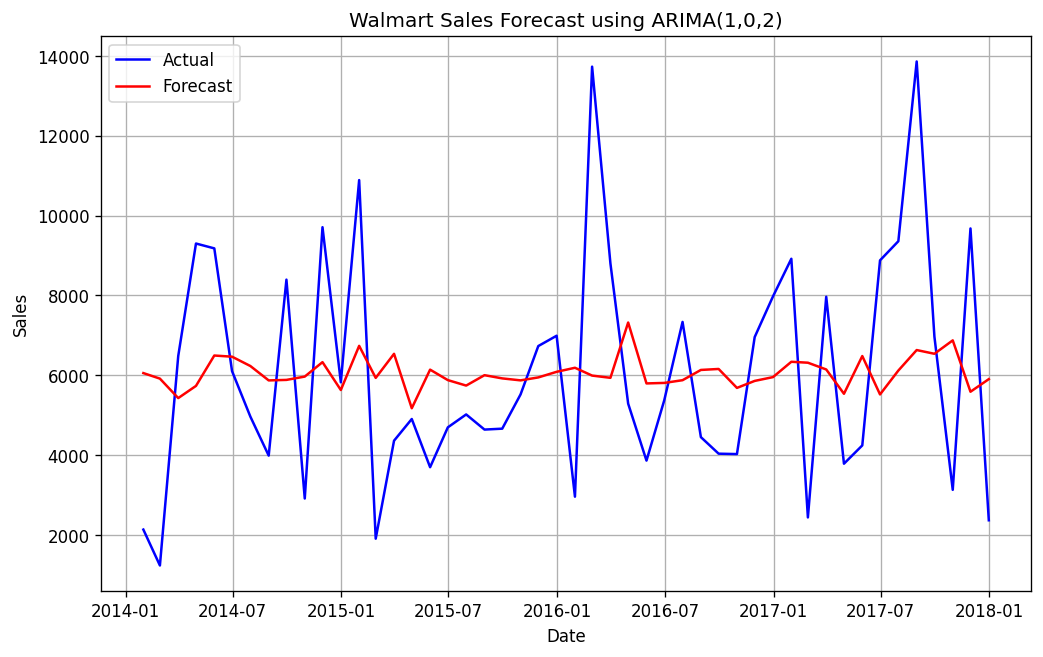

In [ ]:
# Fit the best model on full data
best_model = ARIMA(monthly_sales, order=best_order)
best_model_fit = best_model.fit()
print(best_model_fit.summary())

# In-sample forecast
forecast = best_model_fit.predict()

# Calculate evaluation metrics
mae = mean_absolute_error(monthly_sales, forecast)
rmse = np.sqrt(mean_squared_error(monthly_sales, forecast))
mape = mean_absolute_percentage_error(monthly_sales, forecast) * 100

# Print metrics
print("\nIn-sample Evaluation Metrics:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")


# Plot actual vs. forecasted values
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales, label='Actual', color='blue')
plt.plot(monthly_sales.index, forecast, label='Forecast', color='red')
plt.title(f'Walmart Sales Forecast using {best_model_name}')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

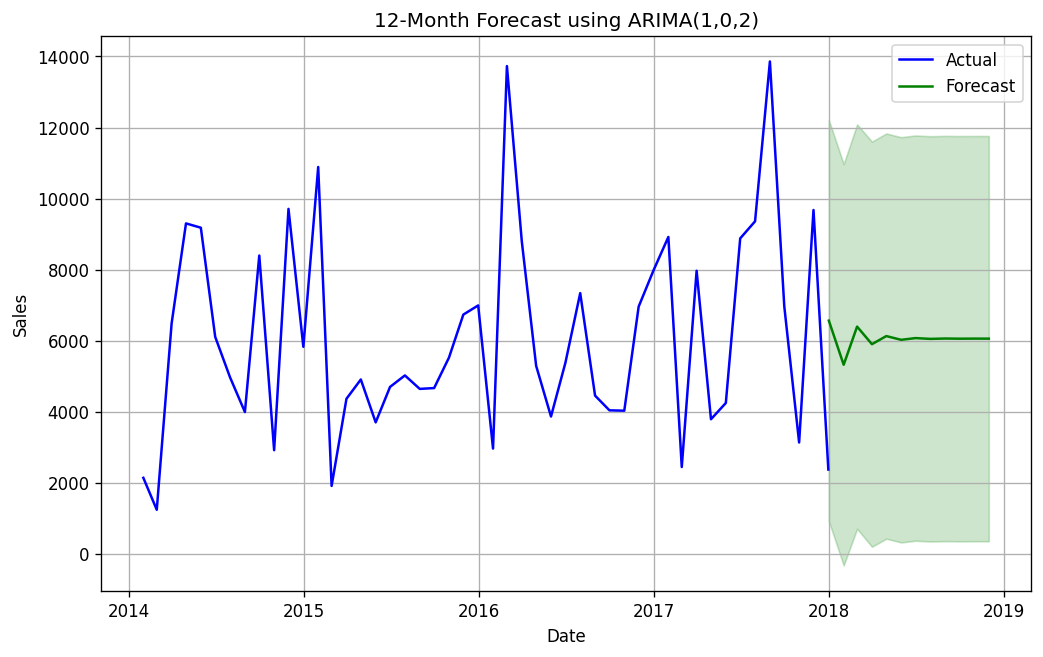

In [ ]:
# Forecast for the next 12 months
n_periods = 12
future_forecast = best_model_fit.forecast(steps=n_periods)
future_index = pd.date_range(start=monthly_sales.index[-1] + pd.offsets.MonthBegin(1), periods=n_periods, freq='MS')

# Plot with confidence intervals
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales, label='Actual', color='blue')
plt.plot(future_index, future_forecast, label='Forecast', color='green')
plt.fill_between(future_index,
                best_model_fit.get_forecast(steps=n_periods).conf_int().iloc[:, 0],
                best_model_fit.get_forecast(steps=n_periods).conf_int().iloc[:, 1],
                color='green', alpha=0.2)
plt.title(f'12-Month Forecast using {best_model_name}')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

DEBUG:cmdstanpy:input tempfile: /tmp/tmp7_wj505o/o_f71rp7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7_wj505o/dcnu946y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51937', 'data', 'file=/tmp/tmp7_wj505o/o_f71rp7.json', 'init=/tmp/tmp7_wj505o/dcnu946y.json', 'output', 'file=/tmp/tmp7_wj505o/prophet_modeladcq3ly2/prophet_model-20250519073136.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
07:31:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:31:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Prophet Test Metrics:
MAE: 2780.14
RMSE: 3630.62
MAPE: 48.12%


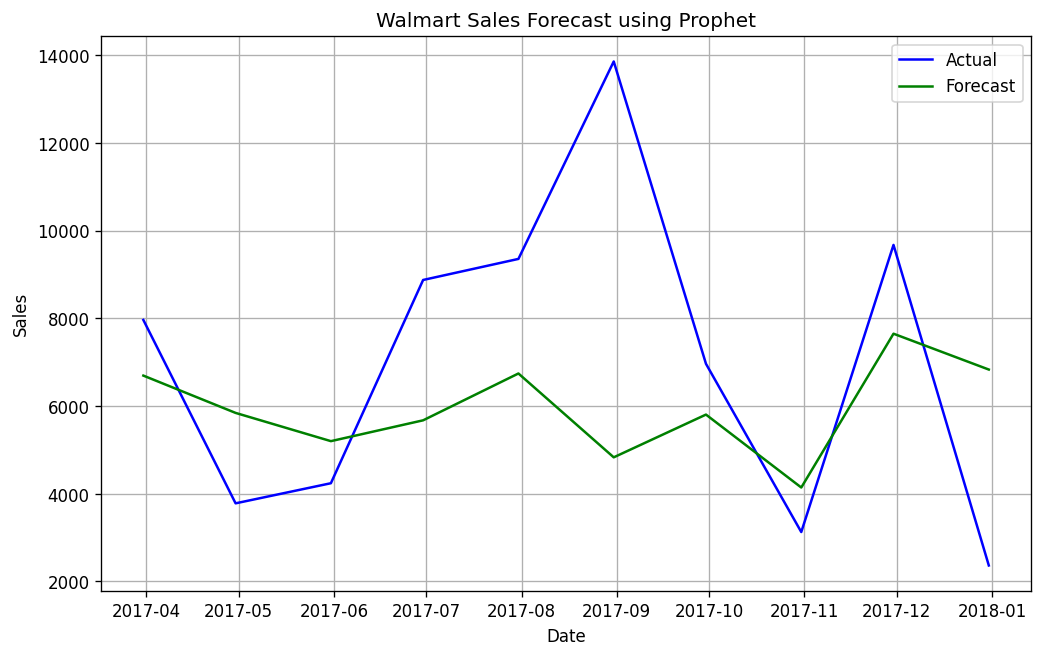

In [ ]:
from prophet import Prophet

# Prepare data for Prophet
prophet_df = monthly_sales.reset_index().rename(columns={'Order Date': 'ds', 'Sales': 'y'})

# Train-test split (80-20)
train_size = int(len(prophet_df) * 0.8)
train, test = prophet_df[:train_size], prophet_df[train_size:]

# Fit Prophet model
model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
model.fit(train)

# Forecast on test data
future = model.make_future_dataframe(periods=len(test), freq='ME')
forecast = model.predict(future)
predictions = forecast[['ds', 'yhat']].tail(len(test))['yhat'].values

# Calculate metrics
mae = mean_absolute_error(test['y'], predictions)
rmse = np.sqrt(mean_squared_error(test['y'], predictions))
mape = mean_absolute_percentage_error(test['y'], predictions) * 100

# Print metrics
print("\nProphet Test Metrics:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

# Plot actual vs. forecasted values
plt.figure(figsize=(10, 6))
plt.plot(test['ds'], test['y'], label='Actual', color='blue')
plt.plot(test['ds'], predictions, label='Forecast', color='green')
plt.title('Walmart Sales Forecast using Prophet')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

DEBUG:cmdstanpy:input tempfile: /tmp/tmp7_wj505o/28r952eb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7_wj505o/igljji38.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78255', 'data', 'file=/tmp/tmp7_wj505o/28r952eb.json', 'init=/tmp/tmp7_wj505o/igljji38.json', 'output', 'file=/tmp/tmp7_wj505o/prophet_modelykkfm_tl/prophet_model-20250519073139.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
07:31:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:31:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


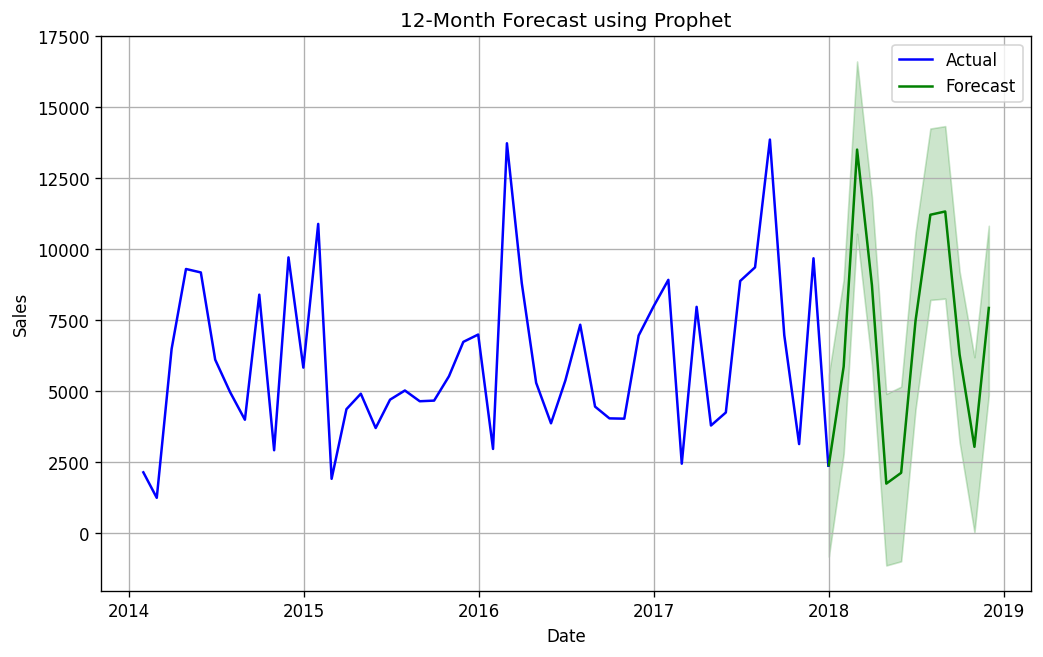

In [ ]:
# Prepare data for Prophet
prophet_df = monthly_sales.reset_index().rename(columns={'Order Date': 'ds', 'Sales': 'y'})

# Fit Prophet model on full data
model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
model.fit(prophet_df)

# Forecast for next 12 months
n_periods = 12
future = model.make_future_dataframe(periods=n_periods, freq='MS')  # Month-start frequency
forecast = model.predict(future)

# Extract forecast and confidence intervals
future_forecast = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(n_periods)

# Plot actual and forecast with confidence intervals
plt.figure(figsize=(10, 6))
plt.plot(prophet_df['ds'], prophet_df['y'], label='Actual', color='blue')
plt.plot(future_forecast['ds'], future_forecast['yhat'], label='Forecast', color='green')
plt.fill_between(future_forecast['ds'],
                 future_forecast['yhat_lower'],
                 future_forecast['yhat_upper'],
                 color='green', alpha=0.2)
plt.title('12-Month Forecast using Prophet')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()